In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [6]:
df2 = pd.read_csv('../results/final_ensembles_orig_features.csv')
grouped2 = df2.groupby(['XGB_params', 'SVM_params', 'Combination', 'split_size']).agg(['mean', 'std'])
grouped2.columns = ['_'.join(col) for col in grouped2.columns]
grouped2.sort_values('score_mean', ascending=False).head(2)

n_features_mean  \
XGB_params                                         SVM_params                                         Combination              split_size                    
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', 'degree': 4, 'gamma': 'scale... ('XGBClassifier', 'SVC') 0.35                    4.0   
                                                                                                                               0.20                    4.0   

                                                                                                                                           n_features_std  \
XGB_params                                         SVM_params                                         Combination              split_size                   
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', 'degree': 4, 'gamma': 'scale... ('XGBClassifier', 'SVC') 0.35                   0.0   
                                                                                                                               0.20                   0.0   

                                                                                                                                            score_mean  \
XGB_params                                         SVM_params                                         Combination              split_size                
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', 'degree': 4, 'gamma': 'scale... ('XGBClassifier', 'SVC') 0.35        6910.571429   
                                                                                                                               0.20        6900.000000   

                                                                                                                                            score_std  \
XGB_params                                         SVM_params                                         Combination              split_size               
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', 'degree': 4, 'gamma': 'scale... ('XGBClassifier', 'SVC') 0.35        196.764386   
                                                                                                                               0.20        276.431079   

                                                                                                                                           accuracy_mean  \
XGB_params                                         SVM_params                                         Combination              split_size                  
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', 'degree': 4, 'gamma': 'scale... ('XGBClassifier', 'SVC') 0.35             0.645149   
                                                                                                                               0.20             0.643730   

                                                                                                                                           accuracy_std  \
XGB_params                                         SVM_params                                         Combination              split_size                 
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', 'degree': 4, 'gamma': 'scale... ('XGBClassifier', 'SVC') 0.35            0.010932   
                                                                                                                               0.20            0.015380   

                                                                                                                                           accuracy_top_20pc_mean  \
XGB_params                                         SVM_params                                         Combination              split_size                           
{'n_estimators': 75, 'learning_rate': 0.01, 'mi... {'kernel': 'poly', '

In [84]:
df = pd.read_csv('../results/ensemble_plot_data.csv')
df.head()
df['Combination'] = df['Combination'].apply(lambda x: x.replace('MLPClassifier', 'MLP').replace('XGBClassifier', 'XGB'))

In [85]:
grouped = df.groupby(['Combination', 'n_features']).agg(['mean', 'std'])
grouped.columns = ['_'.join(col) for col in grouped.columns]
# grouped['Combination'] = grouped['Combination'].apply(lambda x: x.replace('MLPClassifier', 'MLP').replace('XGBClassifier', 'XGB'))
# grouped.sort_values('score_mean', ascending = False)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


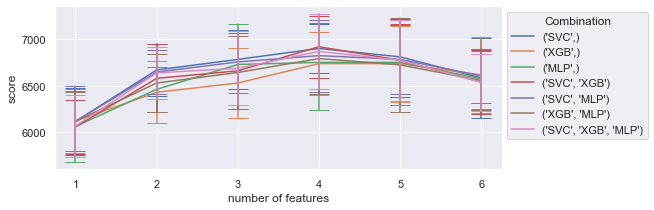

In [111]:
plt.figure(figsize=(8, 3))
ax = sns.lineplot(
    data=df,
    x="n_features",
    y="score",
    hue="Combination",
    # style="Combination",
    # style="feature_selector",
    # hue="feature_selector",
    markers=True,
    errorbar=('sd', 1.2),
    err_style = 'bars',
    err_kws = {"capsize" :10}
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_xlabel('number of features')
ax.set_ylabel('score')
plt.savefig(f"../report/ensemble_vs_features.eps", bbox_inches="tight", dpi = 200)
plt.savefig(f"../report/ensemble_vs_features.png", dpi = 200, bbox_inches="tight")

plt.show()